<a href="https://colab.research.google.com/github/abi672003/CNNs-for-Image-Classification/blob/main/Mini_Project_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using CNNs for Image Classification**

Implement CNN model in realtime using Fashion MNIST dataset


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

**Getting the Dataset ready**


**Read the Dataset**

In [ ]:
train_df = pd.read_csv('/content/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Preprocessing**

In [ ]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way

In [ ]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

**Train Test Val Split**

In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 42)

**Visualization**

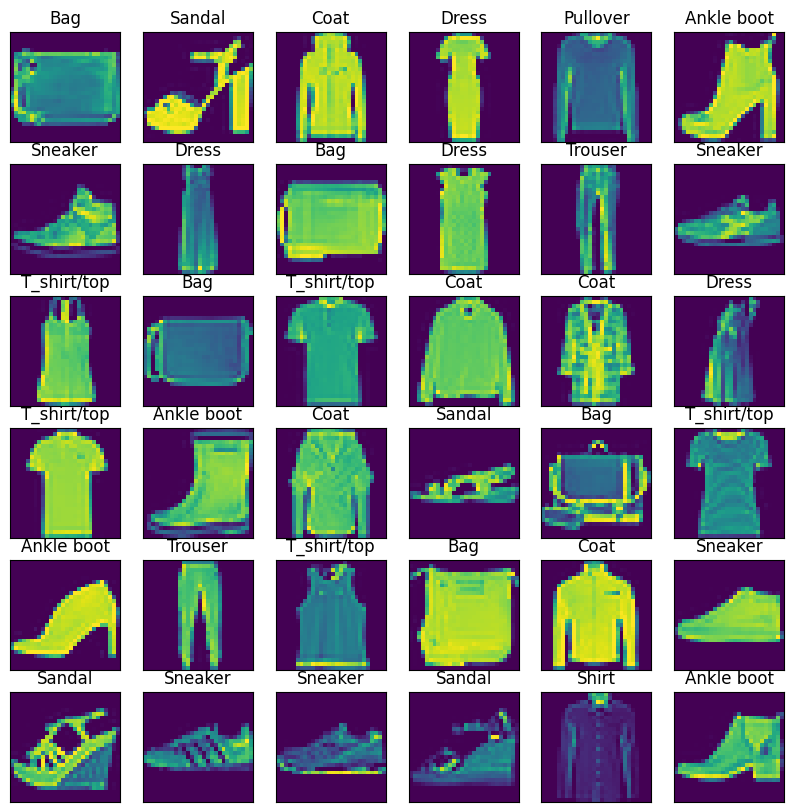

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

**Reshaping to the correct size**

In [ ]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

# **CNN Model**

**Defining the Model**

In [ ]:
# Create a Sequential model
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape),
    # Add a convolutional layer with 32 filters, each having a 3x3 kernel size
    # Apply ReLU activation function to introduce non-linearity
    # Specify the input shape of the first layer as 'image_shape'

    MaxPooling2D(pool_size=2),
    # Add a max pooling layer to downsample the output by taking the maximum value in each 2x2 region
    # Reduces the spatial dimensions, resulting in a 14x14 output

    Dropout(0.2),
    # Add a dropout layer to randomly disable 20% of the neurons during training
    # Helps prevent overfitting by reducing co-adaptation between neurons

    Flatten(),
    # Flatten the multi-dimensional output into a 1-dimensional vector
    # Converts the output into a suitable format for feeding into a fully connected layer

    Dense(32, activation='relu'),
    # Add a fully connected layer with 32 units/neurons
    # Apply ReLU activation function to introduce non-linearity

    Dense(10, activation='softmax')
    # Add a final fully connected layer with 10 units/neurons (corresponding to the number of classes)
    # Apply softmax activation function to obtain class probabilities
])

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

**Model Summary**

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

**Training the Model**

In [ ]:
%%time
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
2/2 [==============================] - 5s 3s/step - loss: 2.2625 - accuracy: 0.1454 - val_loss: 2.1177 - val_accuracy: 0.3330
Epoch 2/75
2/2 [==============================] - 8s 5s/step - loss: 2.0760 - accuracy: 0.3462 - val_loss: 1.9093 - val_accuracy: 0.4375
Epoch 3/75
2/2 [==============================] - 13s 7s/step - loss: 1.8645 - accuracy: 0.4635 - val_loss: 1.6899 - val_accuracy: 0.5415
Epoch 4/75
2/2 [==============================] - 5s 2s/step - loss: 1.6508 - accuracy: 0.5521 - val_loss: 1.4880 - val_accuracy: 0.6175
Epoch 5/75
2/2 [==============================] - 6s 3s/step - loss: 1.4612 - accuracy: 0.6150 - val_loss: 1.3175 - val_accuracy: 0.6400
Epoch 6/75
2/2 [==============================] - 4s 2s/step - loss: 1.2958 - accuracy: 0.6364 - val_loss: 1.1704 - val_accuracy: 0.6715
Epoch 7/75
2/2 [==============================] - 4s 2s/step - loss: 1.1523 - accuracy: 0.6633 - val_loss: 1.0485 - val_accuracy: 0.6915
Epoch 8/75
2/2 [========================

**Evaluating our model**

Text(0.5, 1.0, 'Train - Accuracy')

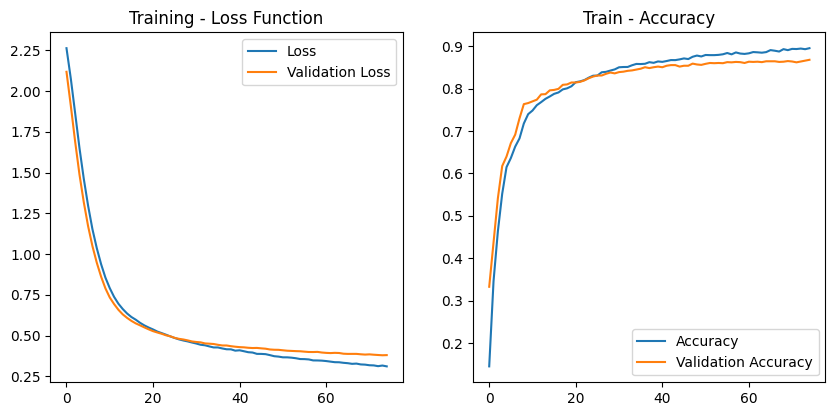

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

**Testing the model on unseen data**

In [ ]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy : {:.2f}'.format(score[1]*100) + '%')

Test Accuracy : 89.68%


**Visualize some test labels**

313/313 [==============================] - 3s 8ms/step


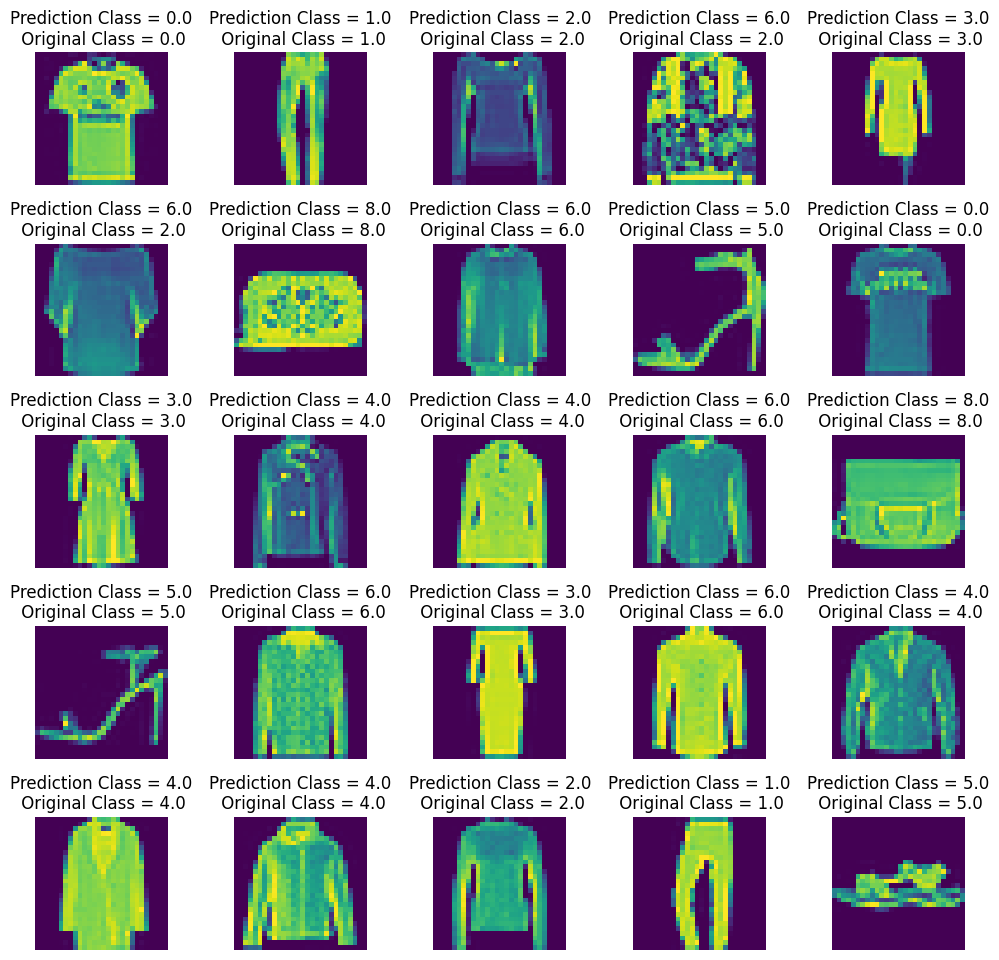

In [ ]:
predicted_probabilities = cnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)